In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Library
imgs = [
  "fig/lenna.jpg"
]

def readi(index):
  name = imgs[index]
  img = cv2.imread(name)
  return img

def imgu8(img):
  if img.dtype != np.uint8:
    img = img * 255
    img[img > 255] = 255
  return np.uint8(img)

def imgfloat(img):
  if img.dtype == np.uint8:
    return np.float32(img)/255
  else:
    return np.float32(img)

def show(figname, img):
  if(img.dtype != np.uint8):
    img = imgu8(img)
  cv2.imshow(figname, img)
  key = cv2.waitKey(0)
  if key == 115: # Key 's'
    cv2.imwrite("fig/"+figname.replace(' ', '_')+".png", img)
  cv2.destroyAllWindows()

def gray2bgr(img):
  return cv2.merge((img, img, img))


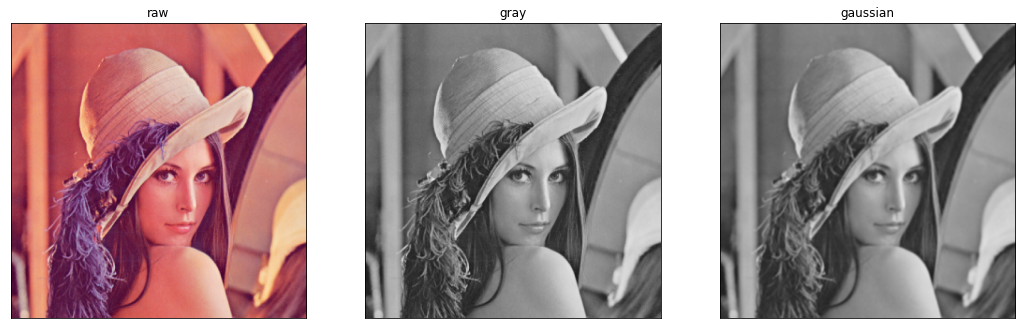

In [106]:
# Load image and preprocess
img = readi(0)
gray = imgfloat(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
img_gaussian = cv2.GaussianBlur(gray,(3,3),0)
plt.rcParams["figure.figsize"] = (18, 6)

plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("raw")
plt.gca().axes.xaxis.set_visible(False)
plt.gca().axes.yaxis.set_visible(False)

plt.subplot(1,3,2)
plt.imshow(gray2bgr(gray))
plt.title("gray")
plt.gca().axes.xaxis.set_visible(False)
plt.gca().axes.yaxis.set_visible(False)

plt.subplot(1,3,3)
plt.imshow(gray2bgr(img_gaussian))
plt.title("gaussian")
plt.gca().axes.xaxis.set_visible(False)
plt.gca().axes.yaxis.set_visible(False)

plt.show()

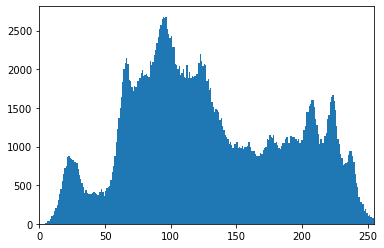

In [111]:
# Histogram
plt.rcParams["figure.figsize"] = (6, 4)
plt.hist(img.ravel(), 255, [0,255])
plt.xlim([0,255])
plt.show()

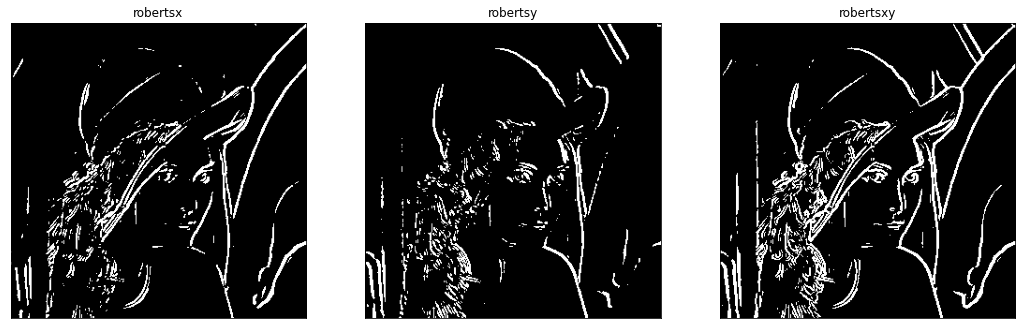

In [88]:
# Roberts
roberts_threshold = 50

roberts_cross_v = np.array( [[1, 0 ], [0,-1 ]] )
roberts_cross_h = np.array( [[ 0, 1 ], [ -1, 0 ]] )

robertsx = np.abs(cv2.filter2D(img_gaussian, -1, roberts_cross_v))
robertsy = np.abs(cv2.filter2D(img_gaussian, -1, roberts_cross_h))
robertsxy = imgu8(np.sqrt( np.square(robertsx) + np.square(robertsy)))

robertsx = imgu8(robertsx / robertsx.max())
robertsy = imgu8(robertsy / robertsy.max())
robertsxy = imgu8(robertsxy / robertsxy.max())

robertsx[robertsx >= roberts_threshold] = 255
robertsx[robertsx < roberts_threshold] = 0
robertsy[robertsy >= roberts_threshold] = 255
robertsy[robertsy < roberts_threshold] = 0
robertsxy[robertsxy >= roberts_threshold] = 255
robertsxy[robertsxy < roberts_threshold] = 0

plt.rcParams["figure.figsize"] = (18, 6)
plt.set_cmap('gray')

plt.subplot(1,3,1)
plt.imshow(robertsx)
plt.title("robertsx")
plt.gca().axes.xaxis.set_visible(False)
plt.gca().axes.yaxis.set_visible(False)

plt.subplot(1,3,2)
plt.imshow(robertsy)
plt.title("robertsy")
plt.gca().axes.xaxis.set_visible(False)
plt.gca().axes.yaxis.set_visible(False)

plt.subplot(1,3,3)
plt.imshow(robertsxy)
plt.title("robertsxy")
plt.gca().axes.xaxis.set_visible(False)
plt.gca().axes.yaxis.set_visible(False)

plt.show()

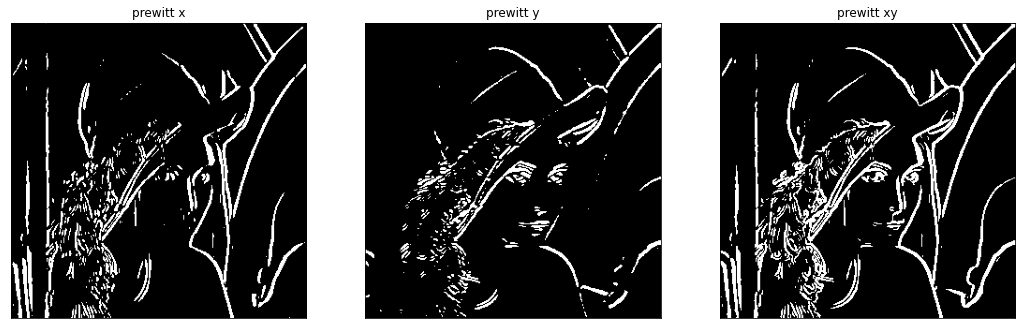

In [112]:
# Prewitt
prewitt_threshold = 50

prewitt_kernelx = np.array([[-1,0,1],
                    [-1,0,1],
                    [-1,0,1]])
prewitt_kernely = np.array([[1,1,1],
                    [0,0,0],
                    [-1,-1,-1]])
prewittx = np.abs(cv2.filter2D(img_gaussian, -1, prewitt_kernelx))
prewitty = np.abs(cv2.filter2D(img_gaussian, -1, prewitt_kernely))
prewittxy = np.sqrt(np.power(prewittx, 2) + np.power(prewitty, 2))

prewittx = imgu8(prewittx / prewittx.max())
prewitty = imgu8(prewitty / prewitty.max())
prewittxy = imgu8(prewittxy / prewittxy.max())

prewittx[prewittx >= prewitt_threshold] = 255
prewittx[prewittx < prewitt_threshold] = 0
prewitty[prewitty >= prewitt_threshold] = 255
prewitty[prewitty < prewitt_threshold] = 0
prewittxy[prewittxy >= prewitt_threshold] = 255
prewittxy[prewittxy < prewitt_threshold] = 0


plt.rcParams["figure.figsize"] = (18, 6)
plt.set_cmap('gray')

plt.subplot(1,3,1)
plt.imshow(prewittx)
plt.title("prewitt x")
plt.gca().axes.xaxis.set_visible(False)
plt.gca().axes.yaxis.set_visible(False)

plt.subplot(1,3,2)
plt.imshow(prewitty)
plt.title("prewitt y")
plt.gca().axes.xaxis.set_visible(False)
plt.gca().axes.yaxis.set_visible(False)

plt.subplot(1,3,3)
plt.imshow(prewittxy)
plt.title("prewitt xy")
plt.gca().axes.xaxis.set_visible(False)
plt.gca().axes.yaxis.set_visible(False)

plt.show()

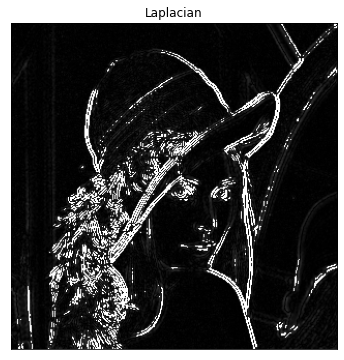

In [114]:
# Laplacian
laplacian_threshold = 50

laplas = np.abs(cv2.Laplacian(img_gaussian, -1,3))
laplas = imgu8(laplas / laplas.max())

laplas[laplas >= laplacian_threshold] = 255
laplas[laplas < 0] = 0

plt.rcParams["figure.figsize"] = (6, 6)
plt.set_cmap('gray')

plt.imshow(laplas)
plt.title("Laplacian")
plt.gca().axes.xaxis.set_visible(False)
plt.gca().axes.yaxis.set_visible(False)
plt.show()

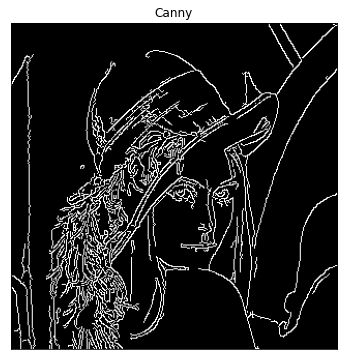

In [115]:
# Canny
canny_threshold = 50

canny = cv2.Canny(imgu8(gray), canny_threshold, 200)

plt.rcParams["figure.figsize"] = (6, 6)
plt.set_cmap('gray')

plt.imshow(gray2bgr(canny))
plt.title("Canny")
plt.gca().axes.xaxis.set_visible(False)
plt.gca().axes.yaxis.set_visible(False)
plt.show()

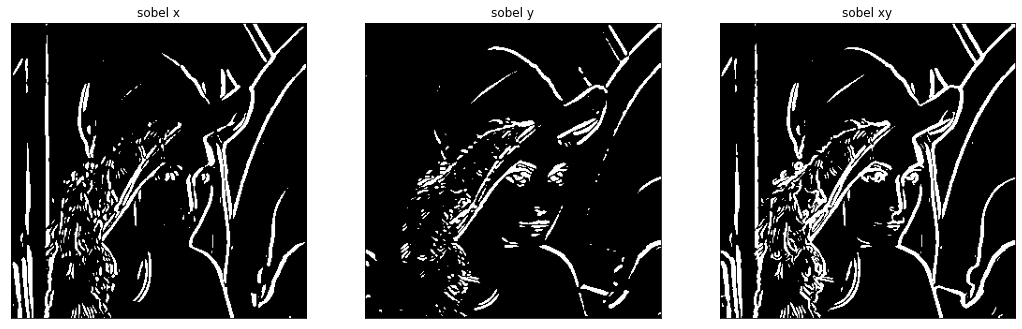

In [117]:
# Sobel
sobel_threshold = 50

sobelx = np.abs(cv2.Sobel(img_gaussian, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5))
sobely = np.abs(cv2.Sobel(img_gaussian, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5))
sobelxy = np.sqrt(np.power(sobelx, 2) + np.power(sobely, 2))

sobelx = imgu8(sobelx / sobelx.max())
sobely = imgu8(sobely / sobely.max())
sobelxy = imgu8(sobelxy / sobelxy.max())

sobelx[sobelx >= sobel_threshold] = 255
sobelx[sobelx < sobel_threshold] = 0
sobely[sobely >= sobel_threshold] = 255
sobely[sobely < sobel_threshold] = 0
sobelxy[sobelxy >= sobel_threshold] = 255
sobelxy[sobelxy < sobel_threshold] = 0

plt.rcParams["figure.figsize"] = (18, 6)
plt.set_cmap('gray')

plt.subplot(1,3,1)
plt.imshow(sobelx)
plt.title("sobel x")
plt.gca().axes.xaxis.set_visible(False)
plt.gca().axes.yaxis.set_visible(False)

plt.subplot(1,3,2)
plt.imshow(sobely)
plt.title("sobel y")
plt.gca().axes.xaxis.set_visible(False)
plt.gca().axes.yaxis.set_visible(False)

plt.subplot(1,3,3)
plt.imshow(sobelxy)
plt.title("sobel xy")
plt.gca().axes.xaxis.set_visible(False)
plt.gca().axes.yaxis.set_visible(False)
plt.show()

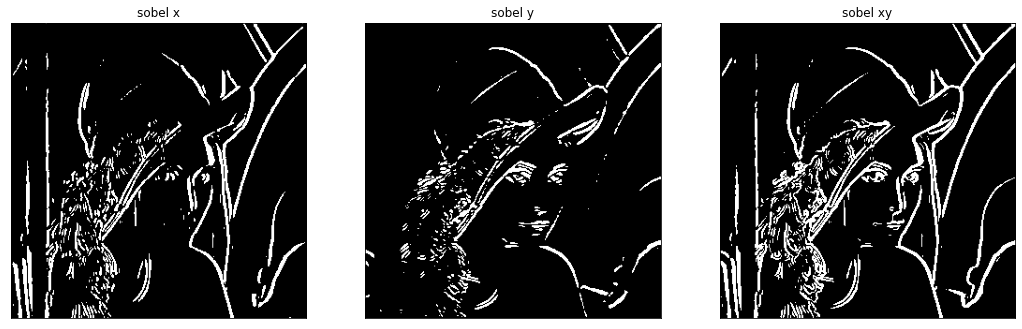

In [116]:
# Sobel
sobel_threshold = 50

sobel_kernel_x = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])
sobel_kernel_y = np.array([[-1,-2,-1],
                           [0, 0, 0,],
                           [1, 2, 1]])
sobel_kernel_xy = np.abs(sobel_kernel_x) + np.abs(sobel_kernel_y)

sobelx = np.abs(cv2.filter2D(img_gaussian, -1, sobel_kernel_x))
sobely = np.abs(cv2.filter2D(img_gaussian, -1, sobel_kernel_y))
sobelxy = np.sqrt(np.power(sobelx, 2) + np.power(sobely, 2))

sobelx = imgu8(sobelx / sobelx.max())
sobely = imgu8(sobely / sobely.max())
sobelxy = imgu8(sobelxy / sobelxy.max())

sobelx[sobelx >= sobel_threshold] = 255
sobelx[sobelx < sobel_threshold] = 0
sobely[sobely >= sobel_threshold] = 255
sobely[sobely < sobel_threshold] = 0
sobelxy[sobelxy >= sobel_threshold] = 255
sobelxy[sobelxy < sobel_threshold] = 0

plt.rcParams["figure.figsize"] = (18, 6)
plt.set_cmap('gray')

plt.subplot(1,3,1)
plt.imshow(sobelx)
plt.title("sobel x")
plt.gca().axes.xaxis.set_visible(False)
plt.gca().axes.yaxis.set_visible(False)

plt.subplot(1,3,2)
plt.imshow(sobely)
plt.title("sobel y")
plt.gca().axes.xaxis.set_visible(False)
plt.gca().axes.yaxis.set_visible(False)

plt.subplot(1,3,3)
plt.imshow(sobelxy)
plt.title("sobel xy")
plt.gca().axes.xaxis.set_visible(False)
plt.gca().axes.yaxis.set_visible(False)
plt.show()